# Read excel

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("data/calories.xlsx")
df.head(10)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ
8,CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ
9,CannedFruit,Canned Fruit Salad,100g,50 cal,210 kJ


In [4]:
df.tail(5)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [10]:
df["FoodCategory"].unique()


array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [11]:
df["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning

- type cast objects to int
- change column names
- convert Cals_per100grams to int
- separate liquids and solids to different dfs 

In [12]:
df.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [14]:
df.rename(
    {"Cals_per100grams": "Calories", "per100grams": "per100", "KJ_per100grams": "kJ"}, 
    axis="columns"
)

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


In [15]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [16]:
df = df.rename(
    {"Cals_per100grams": "Calories", "per100grams": "per100", "KJ_per100grams": "kJ"}, 
    axis="columns"
)

In [17]:
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [21]:
df["Calories"].str[:-3].astype(int)

0        62
1        48
2        92
3        88
4        54
       ... 
2220    617
2221    233
2222    717
2223    180
2224    286
Name: Calories, Length: 2225, dtype: int64

In [22]:
df["Calories"].head()

0    62 cal
1    48 cal
2    92 cal
3    88 cal
4    54 cal
Name: Calories, dtype: object

In [23]:
df["Calories"] = df["Calories"].str[:-3].astype(int)

In [30]:
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [33]:
df["kJ"] = df["kJ"].str[:-3].astype(int)


AttributeError: Can only use .str accessor with string values!

In [34]:
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260
1,CannedFruit,Canned Apricots,100g,48,202
2,CannedFruit,Canned Blackberries,100g,92,386
3,CannedFruit,Canned Blueberries,100g,88,370
4,CannedFruit,Canned Cherries,100g,54,227


In [35]:
df["per100"].value_counts()

per100
100g     1802
100ml     423
Name: count, dtype: int64

In [38]:
liquids = df[df["per100"] == "100ml"]
liquids.head()

,FoodCategory,FoodItem,per100,Calories,kJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71
410,Milk&DairyProducts,Buttermilk,100ml,62,260
412,Milk&DairyProducts,Coconut Milk,100ml,230,966
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374
423,Milk&DairyProducts,Kefir,100ml,55,231


In [40]:
solids = df.query("per100 == '100g'")
solids.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260
1,CannedFruit,Canned Apricots,100g,48,202
2,CannedFruit,Canned Blackberries,100g,92,386
3,CannedFruit,Canned Blueberries,100g,88,370
4,CannedFruit,Canned Cherries,100g,54,227


In [41]:
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260
1,CannedFruit,Canned Apricots,100g,48,202
2,CannedFruit,Canned Blackberries,100g,92,386
3,CannedFruit,Canned Blueberries,100g,88,370
4,CannedFruit,Canned Cherries,100g,54,227


(     FoodCategory             FoodItem per100  Calories    kJ
 0     CannedFruit           Applesauce   100g        62   260
 1     CannedFruit      Canned Apricots   100g        48   202
 2     CannedFruit  Canned Blackberries   100g        92   386
 3     CannedFruit   Canned Blueberries   100g        88   370
 4     CannedFruit      Canned Cherries   100g        54   227
 ...           ...                  ...    ...       ...   ...
 2220      Spreads     Sunflower Butter   100g       617  2591
 2221      Spreads             Tapenade   100g       233   979
 2222      Spreads      Unsalted Butter   100g       717  3011
 2223      Spreads             Vegemite   100g       180   756
 2224      Spreads           Wild Honey   100g       286  1201
 
 [1802 rows x 5 columns],
             FoodCategory                FoodItem per100  Calories    kJ
 409   Milk&DairyProducts             Almond Milk  100ml        17    71
 410   Milk&DairyProducts              Buttermilk  100ml        62   2

## Find out top 5 categories with highest calories

In [52]:
import duckdb
duckdb.query("""SELECT 
                * 
             FROM solids 
             ORDER BY Calories 
             DESC LIMIT 5"""
        ).df()

,FoodCategory,FoodItem,per100,Calories,kJ
0,Soups,Goulash,100g,1009,4238
1,Beef&Veal,Beef Tallow,100g,902,3788
2,Oils&Fats,Lard,100g,902,3788
3,Meat,Chicken Fat,100g,898,3772
4,Pork,Lard,100g,898,3772


In [59]:
solids_sorted = solids.sort_values(by="Calories", ascending=False)
solids_top5 = solids_sorted.head()
solids_sorted.iloc[:5]

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238
1761,Oils&Fats,Lard,100g,902,3788
528,Beef&Veal,Beef Tallow,100g,902,3788
1756,Oils&Fats,Goose Fat,100g,898,3772
599,Meat,Chicken Fat,100g,898,3772


In [61]:
liquids_top5 = liquids.sort_values(by="Calories", ascending=False).head()

In [62]:
liquids_top5

,FoodCategory,FoodItem,per100,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902
1800,VegetableOils,Salmon Oil,100ml,911,3826
1789,VegetableOils,Menhaden Oil,100ml,911,3826
1759,Oils&Fats,Herring Oil,100ml,902,3788


In [70]:

top5_category = df.groupby("FoodCategory")["Calories"].median().sort_values(ascending=False).iloc[:5].reset_index()
top5_category

,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


<Axes: xlabel='FoodCategory', ylabel='Calories'>

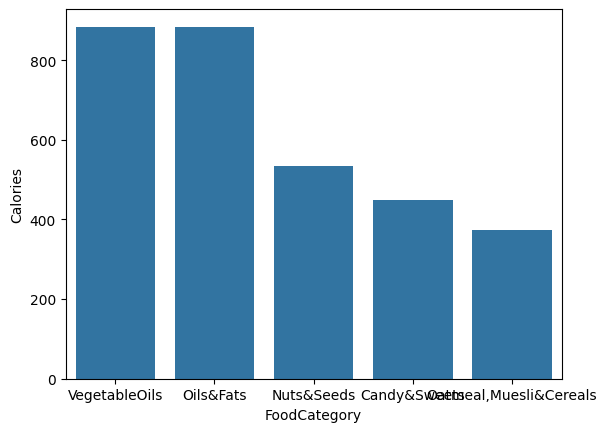

In [71]:
sns.barplot(data=top5_category, x = "FoodCategory", y="Calories")

/var/folders/r2/zm_61wms4bb2j3bk5j7xlgbm0000gn/T/ipykernel_15896/2978104519.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/r2/zm_61wms4bb2j3bk5j7xlgbm0000gn/T/ipykernel_15896/2978104519.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/r2/zm_61wms4bb2j3bk5j7xlgbm0000gn/T/ipykernel_15896/2978104519.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


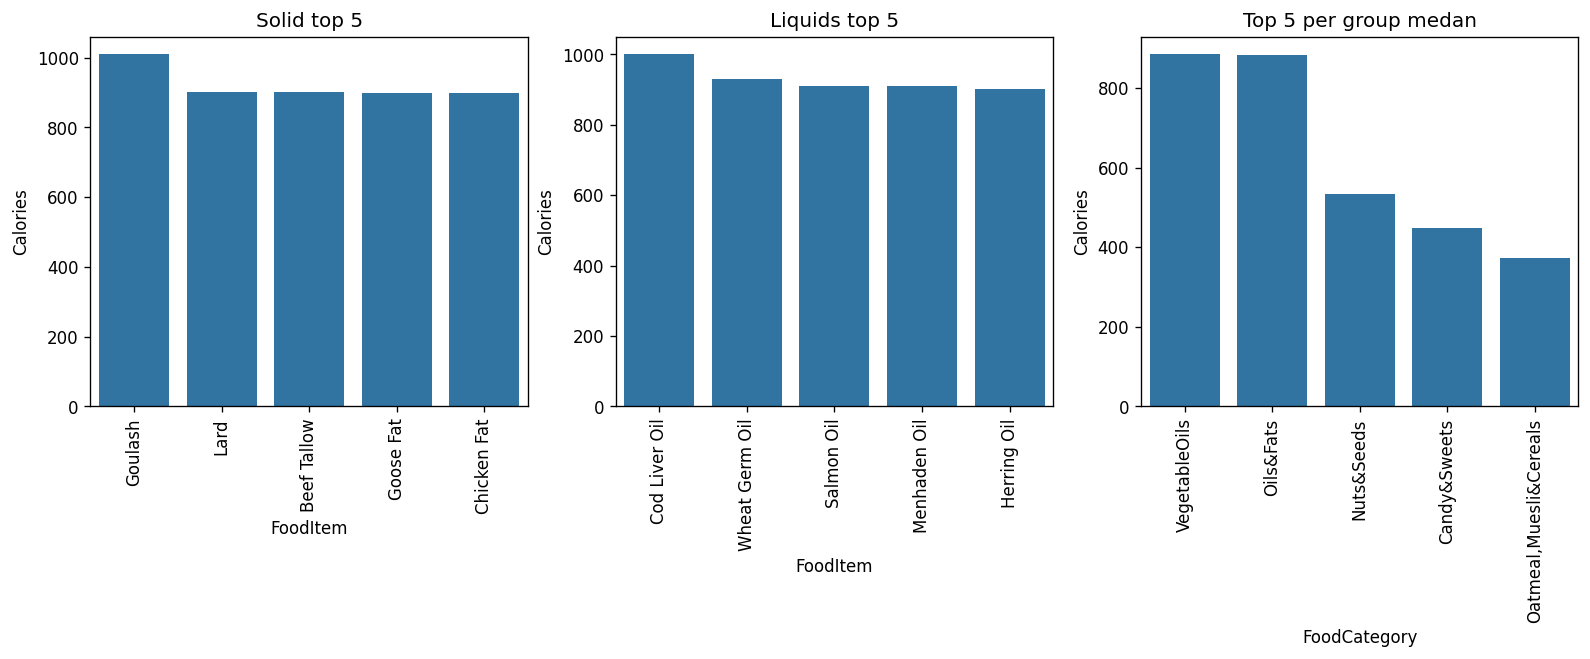

In [77]:
fig, axes = plt.subplots(1,3,dpi=120, figsize=(16,4))
titles = ["Solid top 5", "Liquids top 5", "Top 5 per group medan"]

data_frames = [solids_top5, liquids_top5, top5_category]
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]

for ax, data, title, x_column in zip(axes, data_frames, titles, x_columns):
    sns.barplot(data = data, x = x_column, y= "Calories", ax=ax)
    ax.set(title=title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

fig.savefig("figures/Calories.png", bbox_inches = "tight")